## Fuzzy Logic Implementation in Heart Disease Diagnosis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix for performance evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Step 1: Define membership functions

def age_membership(age):
    """Calculate membership for age categories."""
    young = max(0, min((30 - age) / 10, 1))  # Age < 30
    middle_aged = max(0, min((age - 20) / 10, (50 - age) / 10))  # Age 20-50
    old = max(0, min((age - 40) / 10, 1))  # Age > 40
    return young, middle_aged, old


def blood_pressure_membership(bp):
    """Calculate membership for blood pressure categories."""
    low = max(0, min((120 - bp) / 20, 1))  # BloodPressure < 120
    normal = max(0, min((bp - 110) / 10, (130 - bp) / 10))  # BloodPressure 110-130
    high = max(0, min((bp - 120) / 20, 1))  # BloodPressure > 120
    return low, normal, high


def cholesterol_membership(chol):
    """Calculate membership for cholesterol categories."""
    low = max(0, min((200 - chol) / 50, 1))  # Cholesterol < 200
    normal = max(0, min((chol - 180) / 20, (240 - chol) / 20))  # Cholesterol 180-240
    high = max(0, min((chol - 200) / 50, 1))  # Cholesterol > 200
    return low, normal, high

# Step 2: Define rules

def fuzzy_rules(age, bp, chol):
    """Apply fuzzy rules based on inputs."""
    # Extract membership values
    young, middle_aged, old = age_membership(age)
    low_bp, normal_bp, high_bp = blood_pressure_membership(bp)
    low_chol, normal_chol, high_chol = cholesterol_membership(chol)

    # Rule evaluations (risk: low, medium, high)
    low_risk = min(young, normal_bp, low_chol)
    medium_risk = max(min(middle_aged, high_bp, normal_chol), min(middle_aged, normal_bp, high_chol))
    high_risk = max(min(old, high_bp, high_chol), min(old, normal_bp, high_chol))

    return low_risk, medium_risk, high_risk

# Step 3: Defuzzification

def defuzzify(low_risk, medium_risk, high_risk):
    """Calculate crisp output based on fuzzy output."""
    # Risk levels mapped to numerical scores
    risk_scores = {"low": 25, "medium": 50, "high": 75}

    # Weighted average (Centroid Method)
    numerator = (low_risk * risk_scores["low"] +
                 medium_risk * risk_scores["medium"] +
                 high_risk * risk_scores["high"])
    denominator = (low_risk + medium_risk + high_risk)

    if denominator == 0:  # Avoid division by zero
        return 0

    return numerator / denominator

# Step 4: Testing the system

# Sample input
age = 45  # Patient's age
blood_pressure = 135  # Patient's blood pressure
cholesterol = 250  # Patient's cholesterol level

# Apply fuzzy logic with mamdani method
low_risk, medium_risk, high_risk = fuzzy_rules(age, blood_pressure, cholesterol)
crisp_output = defuzzify(low_risk, medium_risk, high_risk)

# Interpret result
if crisp_output < 33:
    diagnosis = "Low Risk of Heart Disease"
elif crisp_output < 66:
    diagnosis = "Medium Risk of Heart Disease"
else:
    diagnosis = "High Risk of Heart Disease"

# Output results
print("Fuzzy Logic Mamdani Results")
print(f"Age: {age}, Blood Pressure: {blood_pressure}, Cholesterol: {cholesterol}")
print(f"Low Risk Membership: {low_risk:.2f}")
print(f"Medium Risk Membership: {medium_risk:.2f}")
print(f"High Risk Membership: {high_risk:.2f}")
print(f"Crisp Output: {crisp_output:.2f}")
print(f"Diagnosis: {diagnosis}")

Fuzzy Logic Mamdani Results
Age: 45, Blood Pressure: 135, Cholesterol: 250
Low Risk Membership: 0.00
Medium Risk Membership: 0.00
High Risk Membership: 0.50
Crisp Output: 75.00
Diagnosis: High Risk of Heart Disease


### Visualization of our membership functions

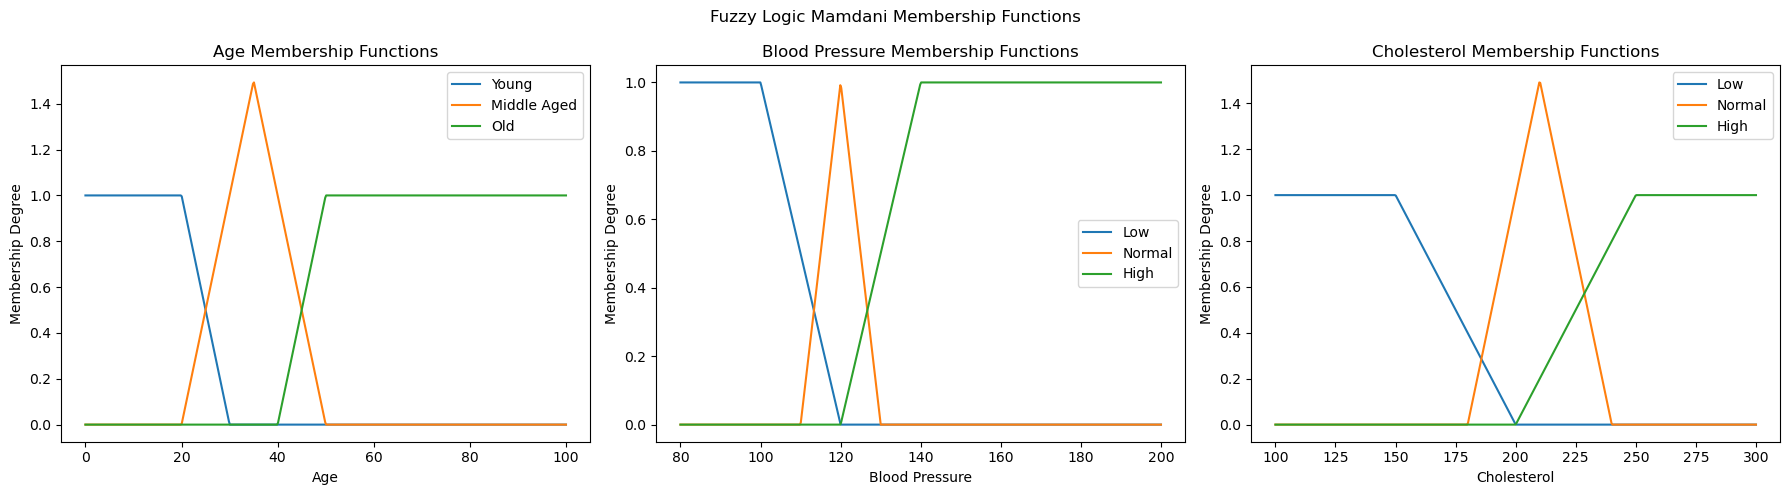

In [3]:
# Define the ranges for each input variable (Age, Blood Pressure, Cholesterol)
# These ranges will be used to evaluate the membership functions
age_range = np.linspace(0, 100, 500)  # Age values from 0 to 100
bp_range = np.linspace(80, 200, 500)  # Blood pressure values from 80 to 200
chol_range = np.linspace(100, 300, 500)  # Cholesterol values from 100 to 300

# Calculate membership values for 'Age' across the defined range
# Extract the membership values for "Young", "Middle Aged", and "Old" categories
age_young = [age_membership(age)[0] for age in age_range]  # Membership for "Young"
age_middle_aged = [age_membership(age)[1] for age in age_range]  # Membership for "Middle Aged"
age_old = [age_membership(age)[2] for age in age_range]  # Membership for "Old"

# Calculate membership values for 'Blood Pressure' across the defined range
# Extract the membership values for "Low", "Normal", and "High" categories
bp_low = [blood_pressure_membership(bp)[0] for bp in bp_range]  # Membership for "Low BP"
bp_normal = [blood_pressure_membership(bp)[1] for bp in bp_range]  # Membership for "Normal BP"
bp_high = [blood_pressure_membership(bp)[2] for bp in bp_range]  # Membership for "High BP"

# Calculate membership values for 'Cholesterol' across the defined range
# Extract the membership values for "Low", "Normal", and "High" categories
chol_low = [cholesterol_membership(chol)[0] for chol in chol_range]  # Membership for "Low Cholesterol"
chol_normal = [cholesterol_membership(chol)[1] for chol in chol_range]  # Membership for "Normal Cholesterol"
chol_high = [cholesterol_membership(chol)[2] for chol in chol_range]  # Membership for "High Cholesterol"

# Plot membership functions for all variables
plt.figure(figsize=(18, 5))

# Plot 'Age' membership functions
plt.subplot(1, 3, 1)
plt.plot(age_range, age_young, label='Young')
plt.plot(age_range, age_middle_aged, label='Middle Aged')
plt.plot(age_range, age_old, label='Old')
plt.title('Age Membership Functions')  
plt.xlabel('Age')
plt.ylabel('Membership Degree')
plt.legend()

# Plot 'Blood Pressure' membership functions
plt.subplot(1, 3, 2)
plt.plot(bp_range, bp_low, label='Low')
plt.plot(bp_range, bp_normal, label='Normal')
plt.plot(bp_range, bp_high, label='High')
plt.title('Blood Pressure Membership Functions')  
plt.xlabel('Blood Pressure')
plt.ylabel('Membership Degree')
plt.legend()

# Plot 'Cholesterol' membership functions
plt.subplot(1, 3, 3)
plt.plot(chol_range, chol_low, label='Low')
plt.plot(chol_range, chol_normal, label='Normal')
plt.plot(chol_range, chol_high, label='High')
plt.title('Cholesterol Membership Functions')
plt.xlabel('Cholesterol')
plt.ylabel('Membership Degree')
plt.legend()


plt.suptitle('Fuzzy Logic Mamdani Membership Functions')
plt.tight_layout()
plt.show()

## Evaluate using our actual Dataset (Heart Disease)

The metric used is `accuracy_score` to evaluate our fuzzy mamdani model

In [4]:
data2 = pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv')
data2 = data2[['age', 'trestbps', 'chol', 'target']]

data2.head()

,age,trestbps,chol,target
0,63,145,233,1
1,37,130,250,1
2,41,130,204,1
3,56,120,236,1
4,57,120,354,1


In [5]:
data2 = pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv')
data2 = data2[['age', 'trestbps', 'chol', 'target']]

# Prediction function
def predict_heart_disease(data):
    predictions = []
    for _, row in data.iterrows():
        age = row['age']
        trestbps = row['trestbps']
        chol = row['chol']
        low_risk, medium_risk, high_risk = fuzzy_rules(age, trestbps, chol)
        crisp_output = defuzzify(low_risk, medium_risk, high_risk)
        if crisp_output < 33:
            predictions.append(0)  # No heart disease
        elif crisp_output < 66:
            predictions.append(0)  # No heart disease
        else:
            predictions.append(1)  # Heart disease
    return predictions

# Apply prediction on dataset
data2['predicted_target'] = predict_heart_disease(data2)

# Evaluate the predictions
def evaluate_predictions(data):
    actual = data['target']
    predicted = data['predicted_target']
    accuracy = accuracy_score(actual, predicted)
    return accuracy

# Get accuracy score
accuracy = evaluate_predictions(data2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.42


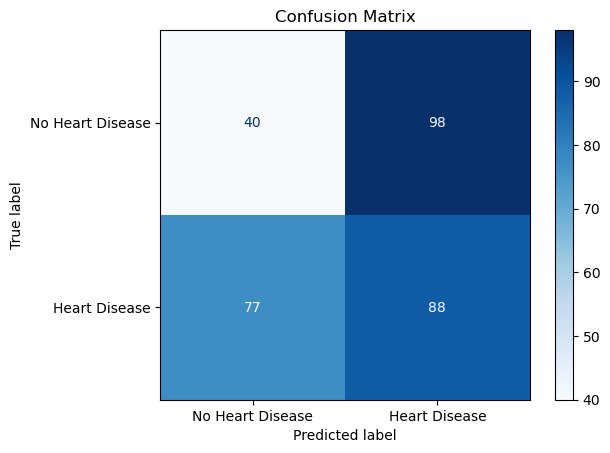

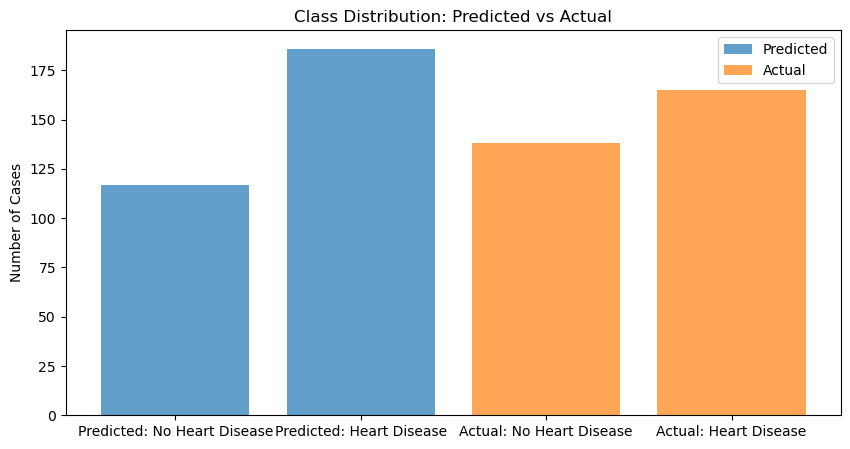

In [6]:
def plot_performance_evaluation(data):
    # Extract actual and predicted values
    actual = data['target']
    predicted = data['predicted_target']
    
    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Calculate and plot class distribution
    class_counts = data['predicted_target'].value_counts()
    class_counts_actual = data['target'].value_counts()

    # Bar plot for predicted and actual class distributions
    plt.figure(figsize=(10, 5))
    plt.bar(['Predicted: No Heart Disease', 'Predicted: Heart Disease'], 
            class_counts.sort_index(), alpha=0.7, label='Predicted')
    plt.bar(['Actual: No Heart Disease', 'Actual: Heart Disease'], 
            class_counts_actual.sort_index(), alpha=0.7, label='Actual')
    plt.title("Class Distribution: Predicted vs Actual")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()

# Run the performance evaluation charts
plot_performance_evaluation(data2)

The accuracy score that we got is `0.42`, meaning that the fuzzy logic model correctly predicts the presence or absence of heart disease approximately 42% of the time based on the dataset.

From the confusion matrix:

- **True Positives (88)**: Correctly predicted cases of heart disease.
- **True Negatives (40)**: Correctly predicted cases of no heart disease.
- **False Positives (98)**: Predicted heart disease when there was none.
- **False Negatives (77)**: Failed to predict heart disease when it was present.

The bar chart showing the predicted versus actual distribution highlights a mismatch, with the model over-predicting heart disease compared to the actual data. This performance suggests that the current fuzzy rules and membership functions may need refinement (perfection) to better represent the dataset's features.